### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

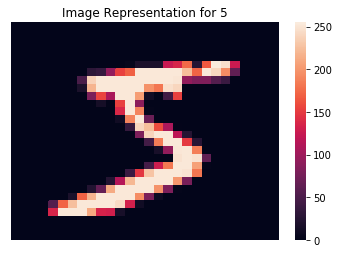

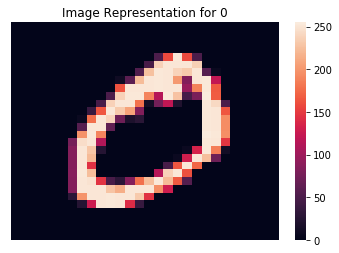

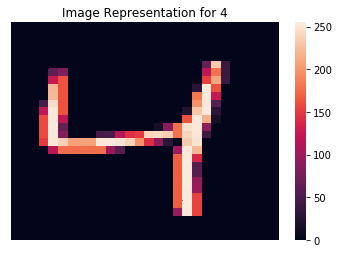

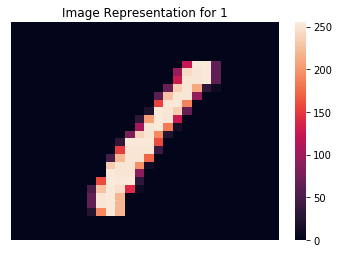

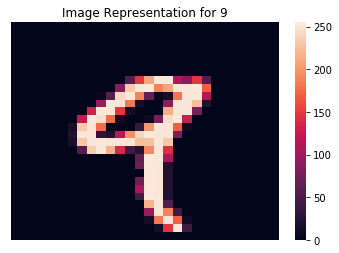

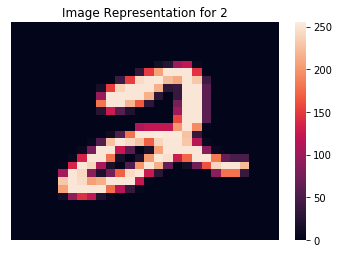

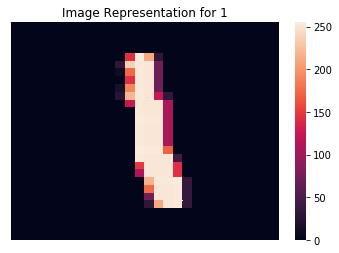

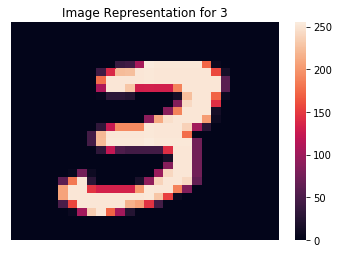

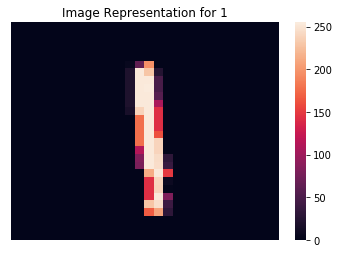

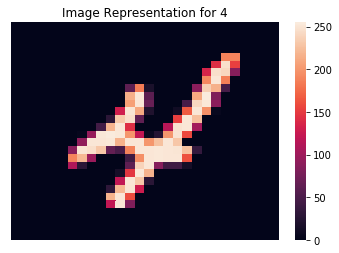

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

In [14]:
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:50000]
y_train = y_shuffle[0:50000]

# KNN classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

##### Calculate Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.97042414,  0.97114058,  0.968735  ])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [17]:
y_train_pred

array([2, 4, 9, ..., 1, 0, 3], dtype=uint8)

In [18]:
y_train

array([2, 4, 9, ..., 1, 0, 3], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [19]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [20]:
confusionMatrix

array([[4911,    3,    5,    0,    0,    3,   19,    1,    2,    3],
       [   2, 5574,    8,    3,    3,    1,    2,    9,    1,    4],
       [  32,   47, 4741,   14,    7,    3,   10,   72,    9,    5],
       [   4,    9,   28, 4956,    1,   56,    5,   28,   37,   20],
       [   4,   42,    1,    1, 4684,    0,   13,   13,    3,  109],
       [  11,    6,    3,   53,    3, 4336,   38,    7,    9,   25],
       [  18,   10,    2,    1,    4,   18, 4903,    0,    3,    0],
       [   3,   45,   15,    2,   12,    1,    0, 5126,    1,   49],
       [  15,   57,   13,   67,   20,   71,   23,   16, 4502,   51],
       [   8,   11,    3,   36,   44,   12,    4,   57,    6, 4772]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

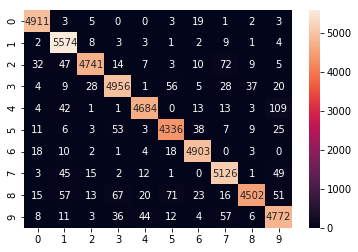

In [21]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [22]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [23]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

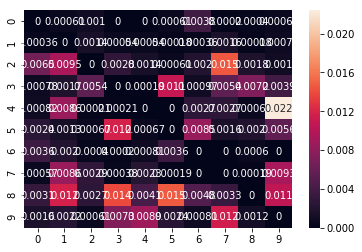

In [24]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [25]:
y_test_pred = knn_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1130,    2,    1,    0,    0,    2,    0,    0,    0],
       [  11,    5,  993,    3,    1,    0,    0,   16,    3,    0],
       [   0,    2,    2,  975,    1,   16,    0,    7,    2,    5],
       [   2,    5,    0,    0,  948,    0,    4,    4,    0,   19],
       [   4,    0,    0,    7,    2,  865,    5,    1,    2,    6],
       [   4,    2,    0,    0,    3,    3,  945,    0,    1,    0],
       [   0,   20,    5,    0,    1,    0,    0,  992,    0,   10],
       [   5,    2,    4,   12,    5,   13,    4,    6,  919,    4],
       [   3,    5,    1,    7,    9,    4,    1,   11,    1,  967]], dtype=int64)

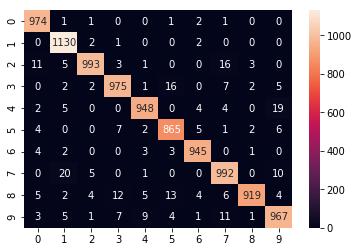

In [27]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [28]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

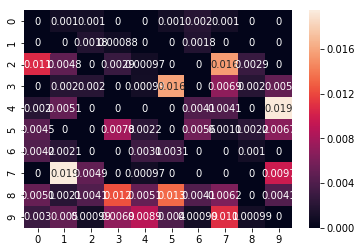

In [29]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9708